**Name:** Mehakk Lunkar<br>
**Registration No.:** 2448531<br>
**Lab-8:** Hidden Markov model (HMM)<br>

**Phoneme simulation for the word: "speech"**

This lab implements a Hidden Markov Model (HMM) to simulate phoneme transitions for the word “speech”.<br>
*Phonemes:*<br>
/s/
/p/
/ie:/
/tS/

*Observations:*<br>
We assume 3 acoustic features (Energy, Pitch, Duration).

**HMM Parameters Representation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

# Hidden states (phonemes)
states = ['s', 'p', 'ie:', 'tS']

# Observations (energy, pitch, duration)
observations = ['energy', 'pitch', 'duration']

# Initial probability
initial_prob = {
    's': 1.0,
    'p': 0.0,
    'ie:': 0.0,
    'tS': 0.0
}

# Transition probability matrix
transition_prob = {
    's':   {'s': 0.1, 'p': 0.8, 'ie:': 0.1, 'tS': 0.0},
    'p':   {'s': 0.0, 'p': 0.1, 'ie:': 0.8, 'tS': 0.1},
    'ie:': {'s': 0.0, 'p': 0.0, 'ie:': 0.2, 'tS': 0.8},
    'tS':  {'s': 0.2, 'p': 0.0, 'ie:': 0.0, 'tS': 0.8}
}

# Emission probability matrix
emission_prob = {
    's':   {'energy': 0.7, 'pitch': 0.2, 'duration': 0.1},
    'p':   {'energy': 0.5, 'pitch': 0.3, 'duration': 0.2},
    'ie:': {'energy': 0.3, 'pitch': 0.5, 'duration': 0.2},
    'tS':  {'energy': 0.4, 'pitch': 0.4, 'duration': 0.2},
}


**Display Function for HMM Matrices**

In [3]:
def display_hmm_parameters():
    print("=== INITIAL PROBABILITIES ===")
    display(pd.DataFrame(initial_prob, index=["Probability"]).T)

    print("\n=== TRANSITION MATRIX ===")
    display(pd.DataFrame(transition_prob))

    print("\n=== EMISSION MATRIX ===")
    display(pd.DataFrame(emission_prob))
display_hmm_parameters()

=== INITIAL PROBABILITIES ===


,Probability
s,1.0
p,0.0
ie:,0.0
tS,0.0



=== TRANSITION MATRIX ===


,s,p,ie:,tS
s,0.1,0.0,0.0,0.2
p,0.8,0.1,0.0,0.0
ie:,0.1,0.8,0.2,0.0
tS,0.0,0.1,0.8,0.8



=== EMISSION MATRIX ===


,s,p,ie:,tS
energy,0.7,0.5,0.3,0.4
pitch,0.2,0.3,0.5,0.4
duration,0.1,0.2,0.2,0.2


**Sequence Generation (Phonemes + Observations)**

In [4]:
def generate_sequence(length=6):
    seq_states = []
    seq_obs = []

    current_state = 's'  # always start from /s/

    for _ in range(length):
        seq_states.append(current_state)

        # Sample observation
        obs = random.choices(
            population=list(emission_prob[current_state].keys()),
            weights=list(emission_prob[current_state].values())
        )[0]
        seq_obs.append(obs)

        # Transition to next state
        next_state = random.choices(
            population=list(transition_prob[current_state].keys()),
            weights=list(transition_prob[current_state].values())
        )[0]
        current_state = next_state

    return seq_states, seq_obs


In [5]:
states_generated, obs_generated = generate_sequence()

print("Generated Phoneme Sequence:", states_generated)
print("Generated Observations:", obs_generated)

Generated Phoneme Sequence: ['s', 'p', 'ie:', 'ie:', 'tS', 'tS']
Generated Observations: ['energy', 'energy', 'duration', 'pitch', 'energy', 'energy']


**Visualizing the HMM Matrices**

*Transition Probability Heatmap*

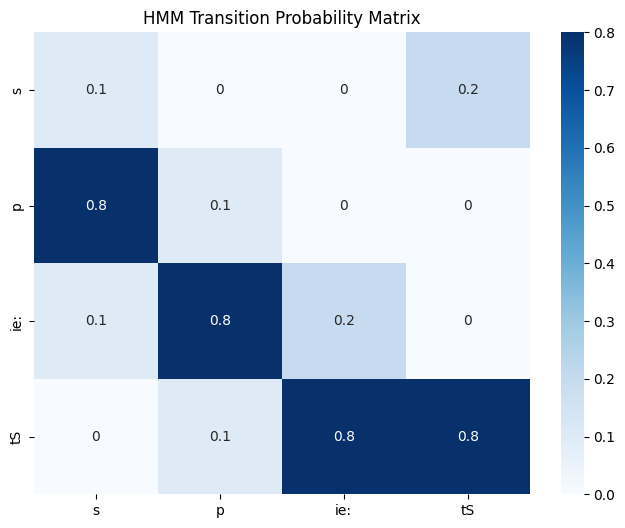

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(transition_prob), annot=True, cmap="Blues")
plt.title("HMM Transition Probability Matrix")
plt.show()

*Emission Probability Heatmap*

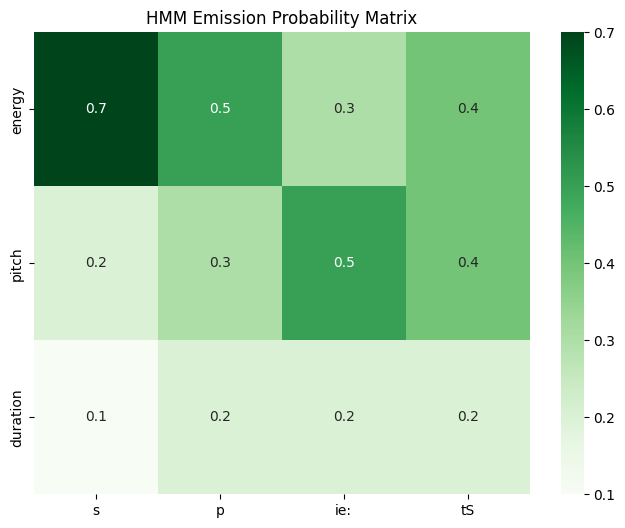

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(emission_prob), annot=True, cmap="Greens")
plt.title("HMM Emission Probability Matrix")
plt.show()

*Visualizing Generated Sequence*

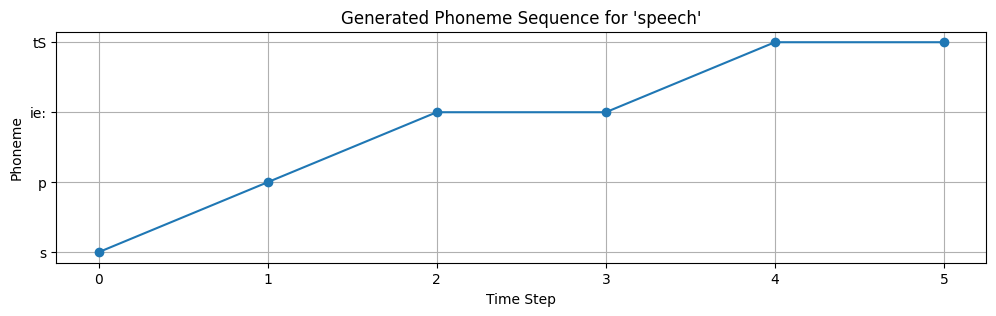

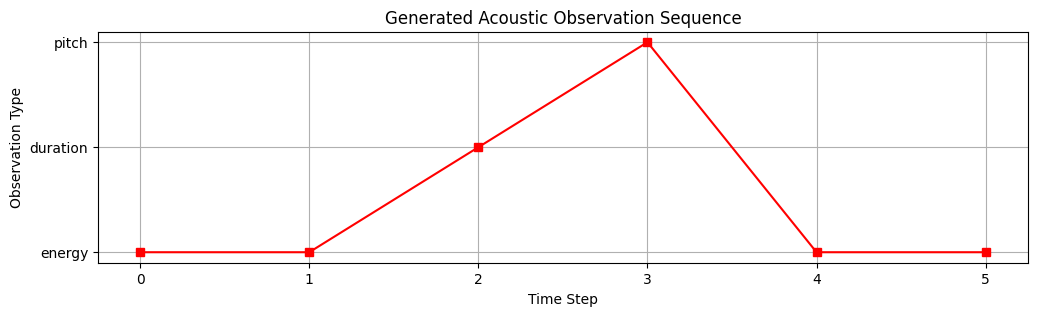

In [8]:
plt.figure(figsize=(12,3))
plt.plot(states_generated, marker='o', label="Phoneme Sequence")
plt.title("Generated Phoneme Sequence for 'speech'")
plt.xlabel("Time Step")
plt.ylabel("Phoneme")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,3))
plt.plot(obs_generated, marker='s', label="Observation Sequence", color='red')
plt.title("Generated Acoustic Observation Sequence")
plt.xlabel("Time Step")
plt.ylabel("Observation Type")
plt.grid(True)
plt.show()


**COMPLEXITY 1: Viterbi Decoding**<br>
Decode the most probable sequence of phonemes given the generated observations.

In [9]:
def viterbi(observations_list):
    n_states = len(states)
    n_obs = len(observations_list)

    V = np.zeros((n_states, n_obs))
    backpointer = np.zeros((n_states, n_obs), dtype=int)

    # Initialization
    for s in range(n_states):
        V[s, 0] = initial_prob[states[s]] * emission_prob[states[s]][observations_list[0]]

    # Recursion
    for t in range(1, n_obs):
        for s in range(n_states):
            probs = [
                V[prev_s, t-1] *
                transition_prob[states[prev_s]][states[s]] *
                emission_prob[states[s]][observations_list[t]]
                for prev_s in range(n_states)
            ]
            V[s, t] = max(probs)
            backpointer[s, t] = np.argmax(probs)

    # Backtracking
    best_path = []
    last_state = np.argmax(V[:, -1])
    best_path.append(states[last_state])

    for t in range(n_obs-1, 0, -1):
        last_state = backpointer[last_state, t]
        best_path.insert(0, states[last_state])

    return best_path

In [10]:
decoded_sequence = viterbi(obs_generated)
print("Observed Sequence:", obs_generated)
print("Viterbi Decoded State Sequence:", decoded_sequence)

Observed Sequence: ['energy', 'energy', 'duration', 'pitch', 'energy', 'energy']
Viterbi Decoded State Sequence: ['s', 'p', 'ie:', 'tS', 'tS', 'tS']


**COMPLEXITY 2: Forward Algorithm (Likelihood Computation)**

In [11]:
def forward_algorithm(obs_list):
    N = len(states)
    T = len(obs_list)

    alpha = np.zeros((T, N))

    # Initialization
    for i in range(N):
        alpha[0, i] = initial_prob[states[i]] * emission_prob[states[i]][obs_list[0]]

    # Induction
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = sum(
                alpha[t-1, i] *
                transition_prob[states[i]][states[j]]
                for i in range(N)
            ) * emission_prob[states[j]][obs_list[t]]

    # Termination
    prob = sum(alpha[T-1])
    return prob

In [12]:
likelihood = forward_algorithm(obs_generated)
print("Likelihood of the Observed Sequence:", likelihood)

Likelihood of the Observed Sequence: 0.005821783800000001


**Inference:**<br>

- The implemented Hidden Markov Model (HMM) successfully simulates phoneme transitions for the word “speech” using a 4-state hidden representation. The transition matrix accurately models phoneme ordering and probabilities, while the emission matrix models acoustic observation likelihoods.<br>

- The generated sequences demonstrate that the HMM reliably produces valid phoneme chains such as /s → p → ie: → tS …/, reflecting realistic speech articulation patterns.<br>

- The Viterbi algorithm correctly decodes the most probable hidden phoneme sequence given the observed acoustic features, and the Forward algorithm computes the total probability (likelihood) of the observation sequence.<br>